# Linear regresion

This is modeled after **Morten Hjorth-Jensen** 
<https://compphysics.github.io/MachineLearning/doc/web/course.html>
Please see his lecture notes and get deeper into Machine Learning.

Linear regresion is a low level (or first step in) machine learning (ML), but all equations can be derived analytically and important concepts for ML can be introduced, such as, the choice of model, assumptions of error, cost function, regularizations, correlations, etc.

Some of the important concepts are:

* **Data input and output**, which we will denote by $D$:
\begin{equation}
D=\{ (x_0,y_0),(x_1,y_1),...(x_{n-1},y_{n-1})\}
\end{equation}
Here $x_i$ is the input and $y_i$ is the onput. $x_i$ can be scalar or large vector of data. Similarly, $y_i$ might be a number, or, classification. 

Examples: i) credit card information for customers: $x_i$ is the amount of loan, the income, the marriage status, etc. The ouput is the prediction that the customer will default, i.e., true/false. ii) handwriting recognition: The input $x_i$ are the pixels of the image, the output is a number or a letter. iii) cancer data: The input $x_i$ are characteristics of the tumor such as its size, radius, smoothness, symmetry, fractal dimension, etc., the output is $M$=malignant, $B$=benign.


* **Model**:  basic assumption about the data to be fit. 

For linear regression we assume that the data can be fit with continuous function $\widetilde{y}(x)$, which is deterministic, and the data has some extra random noise, normally distributed, i.e., 

$$y_i = \widetilde{y}(x_i) + \varepsilon_i$$

where $\widetilde{y}(x)$ can be expanded in terms of some continuous functions, and $\varepsilon = \eta N(0,\sigma^2)$, where $\eta$ is some small number, and $N$ is normal (gaussian) distribution with vanishing mean and width $\sigma$.

* **Cost function** (functional to be minimized):

The simplest is the mean average error (MAE), which is equivalent to $\chi^2$:

$$C = \frac{1}{n} \sum_i (\widetilde{y}(x_i)-y_i)^2$$

but different cost functions, such as **Ridge** regression and **Lasso** regression are often used. 

The cross-entropy is used for binary models (discrete with two outcomes):

$$C=\sum_i y_i \log(p(y_i=1|x_i))+(1-y_i) \log(1-p(y_i=1|x_i))$$

* **Covariance and Correlation matrix**:
It meassures correlation between different features in data. It can be used to eliminate irrelevant parameters from the model or those that are almost linearly dependent.

The **covariance** $cov(\vec{x}_i,\vec{x}_j)$ is defined for two vectors that have many components $\vec{x}_i=x_{n,i}$ and $\vec{x}_j=x_{n,j}$ and takes the form
\begin{eqnarray}
&& cov(\vec{x}_i,\vec{x}_j)= \frac{1}{n} \sum_n (x_{n,i}-<x_i>)(x_{n,j}-<x_j>)\\
&& <x_i>=\frac{1}{n}\sum_n x_{n,i}\\
\end{eqnarray}

The diagonal parts of the covariance is the variance, i.e., 
\begin{eqnarray}
cov(\vec{x}_i,\vec{x}_i) \equiv \sigma^2_i = \frac{1}{n} \sum_n (x_{n,i}-<x_i>)^2,
\end{eqnarray}
which can be "taken out" of covariance matrix to define correlation matrix. The matrix elements of the correlation matrix are simply given by
\begin{eqnarray}
&& corr(\vec{x}_i,\vec{x}_j)= \frac{cov(\vec{x}_i,\vec{x}_j)}{\sqrt{cov(\vec{x}_i,\vec{x}_i)\; cov(\vec{x}_j,\vec{x}_j)}}\\
&& corr(\vec{x}_i,\vec{x}_j)=\frac{1}{\sigma_i \sigma_j} \frac{1}{n}\sum_n (x_{n,i}-<x_i>)(x_{n,j}-<x_j>)\\
\end{eqnarray}

### Linear regression details

In linear regression we try to represent the continuous function $\widetilde{y}(x)$ as a linear superposition of known functions $g_j(x)$ with $j\in[0,...p-1]$. We want to find the coefficients $\beta_j$ of the linear superposition, i.e., 

\begin{eqnarray}
\widetilde{y}(x_i) = \sum_{j=0}^{p-1} g_j(x_i) \beta_j
\end{eqnarray}

The functions $g_j(x)$ can be a polynomial $g_j(x)=x^j$ or the Fourier components $g_j(x)=e^{2\pi j x}$ or Legendre, Chebyshev polynomials, or any other complete set of functions.

Next we define the **Design** matrix $\mathbf{X}$, which is a rectangular matrix with $\mathbb{R}^{n\times p}$, where $n$ is the dimension of the input data components, and $p$ is the number of functions we will use in the expansion

\begin{equation}
\mathbf{X} =
\begin{bmatrix} g_0(x_0) & g_1(x_0) & \cdots & g_{p-1}(x_0) \\
                g_0(x_1) & g_1(x_1) & \cdots & g_{p-1}(x_1) \\
                \cdots\\
                g_0(x_{n-1}) & g_1(x_{n-1}) &\cdots & g_{p-1}(x_{n-1})
\end{bmatrix}
\end{equation}
Normaly we expect $n<p$ so that data is not overfitted.

We also define the vector of unknown parameters $\boldsymbol{\beta}^T=[\beta_0,\beta_1,...\beta_{p-1}]$ and in terms of the two, we can write a matrix equation

\begin{equation}
\widetilde{y} = \mathbf{X} \boldsymbol{\beta}
\end{equation}

The design matrix contains the complexity of the model, and is defined solely by the input data and the choice of the model.
The model is linear in the unknown parameters $\beta$, hence linear regression.

The **cost function** $C$ for the model will gives us the quality of the fit. It is now a funcion of the unknown parameters

\begin{equation}
C(\boldsymbol{\beta})=\frac{1}{n}\sum_{i=0}^{n-1} (y_i-\widetilde{y}(x_i))^2 = 
\frac{1}{n}\sum_{i=0}^{n-1} (y_i-(\mathbf{X}\boldsymbol{\beta})_i)^2 
\end{equation}
and should be minimized, i.e., 
$\frac{\partial C(\beta)}{\partial \beta}=0$. When the minimum is reached, we obtain the optimized parameters, which we will call $\beta^*= \min C(\beta)$, $\beta\in \mathbb{R}^p$.


The derivative $$\frac{\partial C(\beta)}{\partial \beta}$$ can readily be obtained

\begin{eqnarray}
\frac{\partial C(\beta)}{\partial \beta_l}=\frac{\partial}{\partial \beta_l}\frac{1}{n}\sum_{i=0}^{n-1}(y_i - X_{ij}\beta_j)^2
\end{eqnarray}
Here we use Einstein notation in which the sum over the repeated indices is assumed.
\begin{eqnarray}
\frac{\partial C(\beta)}{\partial \beta_l}=\frac{1}{n}\sum_i 2(y_i-X_{ij}\beta_j)(-1)X_{il}= -2 \frac{1}{n} (\mathbf{X}^T(\boldsymbol{y}-\mathbf{X} \boldsymbol{\beta}))_l
\end{eqnarray}

The minimum is reached at $\frac{\partial C(\beta)}{\partial \beta}=0$:
\begin{eqnarray}
\mathbf{X}^T \boldsymbol{y}=\mathbf{X}^T \mathbf{X} \boldsymbol{\beta^*}
\end{eqnarray}
or
\begin{eqnarray}
\boldsymbol{\beta^*}= (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \boldsymbol{y}
\end{eqnarray}
and therefore optimal $\widetilde{y}$ is
\begin{eqnarray}
\widetilde{y} = \mathbf{X}\boldsymbol{\beta^*}= \mathbf{X}(\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \boldsymbol{y}
\end{eqnarray}


The last equation says that the optimal model is given by the projection of data $y$ into a space spanned by functions $g_j(x_i)$ as encoded in design matrix $\mathbf{X}$.

One can readily check that $\mathbf{X}(\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T$ has the property of a projector $P^2=P$.

How do we know this is minimum? We compute the second derivative, and determine its sign. The second derivative is
\begin{eqnarray}
\frac{\partial^2 C(\beta)}{\partial \beta_j \partial \beta_l}=
\frac{\partial}{\partial \beta_j }
\frac{1}{n}\sum_i 2(y_i-X_{ij}\beta_j)(-1)X_{il}= \frac{2}{n}\sum_i X_{ij}X_{il}=
\frac{2}{n} (\mathbf{X}^T \mathbf{X})_{jl}
\end{eqnarray}

We will show thet $\mathbf{X}^T \mathbf{X}$ is positive definite matrix, hence, $C(\beta^*)$ is a global minimum.

If functions $g_j(x)$ are linearly dependent (or features in ML are linearly dependent) the design matrix $X$ can be singular, and $Det(\mathbf{X}^T \mathbf{X})=0$. In that case the inversion of this matrix is not possible, and we need to either 
* perform a pseudo-inverse, or,
* regularize the cost function.

If $Det(\mathbf{X}^T \mathbf{X})=0$ we can still use SVD decomposion to inverse the matrix. This is called pseudo-inverse, as the real inverse does not exist.

If matrix is singular or is non-quadratic matrix, we can still define pseudo-inverse $A^+$, such that $A A^+ A= A$ and $A^+ A A^+=A^+$, where $A A^+$ and $A^+ A$ is Hermitian, but is not identity matrix. This pseudoinverse is achieved by SVD.

For any matrix (quadratic or non-quadratic), the following decomposition exists:

$$\mathbf{X} = U \sigma V^\dagger$$

where $U$ and $V$ are unitary matrices ($U^\dagger U=1$ and $V^\dagger V=1$), and $\sigma$ is diagonal matrix with real singular values on diagonal. If $\mathbf{X}\in \mathbb{R}^{n\times p}$ then $U\in \mathbb{R}^{n\times n}$ and $V\in \mathbb{R}^{p\times p}$ and $\sigma$ is rectangular matrix with $\min(n,p)$ values.

Next we use SVD for Design matrix $\mathbf{X}$ to obtain 
$$\mathbf{X}=U\sigma V^T, $$ and therefore 
$$\mathbf{X}^T=V \sigma U^T.$$
Note that the number of singular values is $p<n$.
We than have
$$\mathbf{X}^T \mathbf{X}=V \sigma U^T U\sigma V^T = V \sigma^2 V^T$$
and now the pseudo-inverse of this matrix is
$$(\mathbf{X}^T \mathbf{X})^{-1}= V \frac{1}{\sigma^2} V^T$$
where the singular values that vanish are omitted.

We also point out that
$$\mathbf{X}^T \mathbf{X} V = V \sigma^2 $$
which shows that $V$ are eigenvectors of matrix $\mathbf{X}^T \mathbf{X}$ and $\sigma^2$ are eigenvalues of the same matrix. Since $\sigma\in \mathbb{R}$ therefore $\sigma^2 \ge 0$. We just proved previous claim that the second derivative of the cost function is positive and hence $\beta^*$ is a global minimum. Namely $$\frac{\partial^2 C(\beta)}{\partial \beta_j \partial \beta_l}=\frac{2}{n} (\mathbf{X}^T \mathbf{X})_{jl}=\frac{2}{n} (V \sigma^2 V^T)_{jl}$$
is positive definite matrix because all eigenvalues are positive.

Finally, we also express $\beta^*$ and $\widetilde{y}$ in terms of singular values $\sigma$,
$$\beta^*= (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T y = V \frac{1}{\sigma} U^T y$$
and 
$$\widetilde{\mathbf{y}}_i= (\mathbf{X} \boldsymbol{\beta})_i= \sum_{l,\sigma_l>0} U_{il} U^T_{lj} y_j.$$

Note that $U U^T=1$, but the sum above runs only over components for which $\sigma_l>0$, hence $\sum'_l U_{il} U^T_{lj}$ above is a projection and not unity. Only if $X$ is a square non-singular matrix than   $\sum'_l U_{il} U^T_{lj}$ is unity and $\widetilde{y}=y$.



As mentioned above, different types of cost functions exist, which regularize the singularity of $\mathbf{X}^T X$ in different ways. The most famous are **Ridge** regression and **Lasso** regression.

In **Ridge** regression we add lagrange multiplayer $\lambda$ such that $\sum_j \beta_j^2$ (or equivalently $||\boldsymbol{\beta}||_2^2$) does not explode. At the same time, it also regularizes the inverse, and hence allows one to avoid pseudo-inverse.

The **Ridge** cost function is 
$$C(\beta)=\frac{1}{n} \sum_{i=0}^{n-1} (y_i-\widetilde{y}_i)^2 +\lambda \frac{1}{n}\sum_{j=0}^{p-1}\beta_j^2$$
which is a constrained optimization that requires $||\boldsymbol{\beta}||_2^2$ to be as small as possible ($\lambda>0$), hence the purpose of such regularization is to prohibit the parameters $\beta$ to become too large. In ML we typically not optimize $C$ with respect to $\lambda$, but we rather keep it is hyperparameter, which is another parameter of the model that allows one to tune the model to best describe the data.

We can take the derivative of the cost function as before, to obtain
\begin{eqnarray}
\frac{\partial C(\beta)}{\partial \beta_l}=\frac{1}{n}\sum_i 2(y_i-X_{ij}\beta_j)(-1)X_{il} +\frac{2}{n}\lambda \beta_l= 2 \frac{1}{n} (\mathbf{X}^T(\mathbf{X} \boldsymbol{\beta}-\boldsymbol{y})+\lambda \boldsymbol{\beta})_l
\end{eqnarray}
which has a minimum at
$$(\mathbf{X}^T \mathbf{X}+\lambda) \boldsymbol{\beta}^*=\mathbf{X}^T y$$
or
$$\boldsymbol{\beta}^*=(\mathbf{X}^T \mathbf{X}+\lambda)^{-1}\mathbf{X}^T y$$
which clearly avoids singularity of the inverse $\mathbf{X}^T \mathbf{X}$ because $\lambda>0$ and $\mathbf{X}^T \mathbf{X}$ is positive definite matrix.

The parameter $\lambda$ is also called shrinkage  parameter, because it removes singular values which are small, i.e., removes less important degrees of freeedom.

To see that, we use SVD decomposition of $\mathbf{X}=U \sigma V^T$ as before, and we see that $\mathbf{X}^T \mathbf{X}+\lambda=V (\sigma^2+\lambda) V^T$, hence 
$$\beta^*_{Ridge}=(\mathbf{X}^T \mathbf{X}+\lambda)^{-1} \mathbf{X}^T y=V \frac{1}{\sigma^2+\lambda} V^T V\sigma U^T y = V \frac{\sigma}{\sigma^2+\lambda} U^T y$$
hence when compared to regular linear regression, Ridge regression replaces $$\frac{1}{\sigma}\rightarrow \frac{\sigma}{\sigma^2+\lambda}$$
which essentially removes singular values which are much smaller than $\lambda$, i.e., we keep only singular values which are comparable or larger than $\lambda$ in the final result, shrinking the set of parameters $\beta$.

Another type of regression is called **Lasso** regression, which adds absolute values of parameters $\beta$ to cost function, i.e., 
$$C(\beta)=\frac{1}{n} \sum_{i=0}^{n-1} (y_i-\widetilde{y}_i)^2 +\lambda \frac{1}{n}\sum_{j=0}^{p-1}|\beta_j|$$
which gives derivative
\begin{eqnarray}
\frac{\partial C(\beta)}{\partial \beta_l}=\frac{1}{n}\sum_i 2(y_i-X_{ij}\beta_j)(-1)X_{il} +\frac{1}{n}\lambda\; \mathrm{sign}(\beta_l)= 2 \frac{1}{n} (\mathbf{X}^T(\mathbf{X} \boldsymbol{\beta}-\boldsymbol{y})+\frac{\lambda}{2} \mathrm{sign}(\boldsymbol{\beta}))_l
\end{eqnarray}
and requires one to solve
\begin{eqnarray}
\mathbf{X}^T \mathbf{y}=\mathbf{X}^T\mathbf{X} \boldsymbol{\beta}^* + \frac{\lambda}{2} \mathrm{sign}(\boldsymbol{\beta}^*)
\end{eqnarray}
No close analytical solution for $\beta^*$ exists for this equation, and only numerical solution can be found.

### Simple linear regression model using **scikit-learn**

We start with comparing our linear regression results with those of **Scikit-Learn** library. 

To demonstrate capabilities, we will solve the problem of nuclear binding energies.


A popular and physically intuitive model which can be used to parametrize 
the experimental binding energies of all nucleai in periodic table is the so-called 
**liquid drop model**. The ansatz is based on the following expression
$$BE(N,Z) = a_0 + a_1 A-a_2 A^{2/3}-a_3\frac{Z^2}{A^{1/3}}-a_4\frac{(N-Z)^2}{A},$$
where $A$ stands for the number of nucleons and the $a_i$s are parameters which are determined by a fit to the experimental data.  

To arrive at the above expression we have assumed that we can make the following assumptions:

 * There is a volume term $a_1A$ proportional with the number of nucleons (the energy is also an extensive quantity). When an assembly of nucleons of the same size is packed together into the smallest volume, each interior nucleon has a certain number of other nucleons in contact with it. This contribution is proportional to the volume.

 * There is a surface energy term $a_2A^{2/3}$. The assumption here is that a nucleon at the surface of a nucleus interacts with fewer other nucleons than one in the interior of the nucleus and hence its binding energy is less. This surface energy term takes that into account and is therefore negative and is proportional to the surface area.

 * There is a Coulomb energy term $a_3\frac{Z^2}{A^{1/3}}$. The electric repulsion between each pair of protons in a nucleus yields less binding. 

 * There is an asymmetry term $a_4\frac{(N-Z)^2}{A}$. This term is associated with the Pauli exclusion principle and reflects the fact that the proton-neutron interaction is more attractive on the average than the neutron-neutron and proton-proton interactions.


We will fit the binding energy $BE$ as a function of $A$ with functions 
$g_0(x)=1$, $g_1(x)=x$, $g_2(x)=x^{2/3}$, $g_3(x)=x^{-1/3}$, $g_4(x)=1/x$. 

The binding energies are in file "NucleousEnergy.dat".
The Python code follows here.

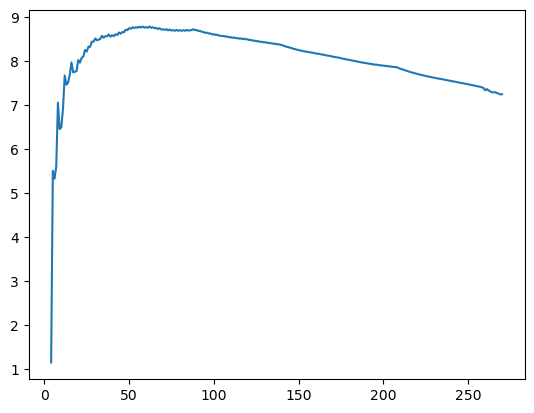

In [6]:
# Binding energy in terms of nucleous weight A==x, is in this file
from numpy import *
from pylab import *

na_data = loadtxt('NucleousEnergy.dat').T
x,y = na_data
plot(x,y)
show()

In [7]:
# Seeting up the Design matrix
X=zeros((len(x),5))
X[:,0]=1        # all functions we need
X[:,1]=x
X[:,2]=x**(2/3)
X[:,3]=x**(-1/3)
X[:,4]=1./x

In [8]:
from sklearn.linear_model import LinearRegression

# Using scikit to get coefficients
lg = LinearRegression()
clf=lg.fit(X,y)
yt=clf.predict(X)   # widetilde(y)

This is an equivalent code, but using our own equations derived above.

In [9]:
# matrix inversion to find beta
Beta = dot(linalg.inv(X.T @ X) @ X.T, y)
# and then make the prediction
ytilde = X @ Beta

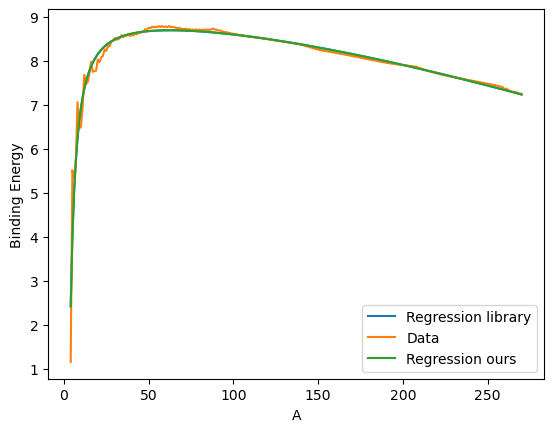

In [10]:
# comparing the regression with data and our regression with those from the library 

plot(x,yt,label='Regression library')
plot(x,y, label='Data')
plot(x,ytilde,label='Regression ours')
xlabel('A')
ylabel('Binding Energy')
legend(loc='best')
show()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_error

# more information from library
print('The intercept alpha: \n', lg.intercept_)
print('Coefficient beta : \n', lg.coef_)
print('Our coefficients: \n', Beta)
# The mean squared error                               
print("Mean squared error: %.2f" % mean_squared_error(y, yt))
# Explained variance score: 1 is perfect prediction                                 
print('Variance score: %.2f' % r2_score(y, yt))
# Mean squared log error                                                        
print('Mean squared log error: %.2f' % mean_squared_log_error(y, yt) )
# Mean absolute error                                                           
print('Mean absolute error: %.2f' % mean_absolute_error(y, yt))

The intercept alpha: 
 5.294399745619717
Coefficient beta : 
 [ 0.00000000e+00 -2.96611194e-02  2.01719003e-01  1.08078025e+01
 -4.03097597e+01]
Our coefficients: 
 [ 5.29439975e+00 -2.96611194e-02  2.01719003e-01  1.08078025e+01
 -4.03097597e+01]
Mean squared error: 0.02
Variance score: 0.95
Mean squared log error: 0.00
Mean absolute error: 0.05


The function **meansquarederror** gives us the mean square error, a risk metric corresponding to the expected value of the squared (quadratic) error or loss defined as
$$
MSE(\boldsymbol{y},\boldsymbol{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$
This function is equivalent to the $\chi^2$ function defined above.

Another quantity is the mean absolute error (MAE), a risk metric corresponding to the expected value of the absolute error loss using $l1$-norm. 
The MAE is defined as follows
$$
\text{MAE}(\boldsymbol{y}, \boldsymbol{\tilde{y}}) = \frac{1}{n} \sum_{i=0}^{n-1} \left| y_i - \tilde{y}_i \right|.
$$
We present the 
squared logarithmic (quadratic) error
$$
\text{MSLE}(\boldsymbol{y}, \boldsymbol{\tilde{y}}) = \frac{1}{n} \sum_{i=0}^{n - 1} (\log_e (1 + y_i) - \log_e (1 + \tilde{y}_i) )^2,
$$
where $\log_e (x)$ stands for the natural logarithm of $x$. This error
estimate is best to use when targets having exponential growth, such
as population counts, average sales of a commodity over a span of
years etc. 

Finally, another cost function is the Huber cost function used in robust regression.

The rationale behind this possible cost function is its reduced
sensitivity to outliers in the data set. In our discussions on
dimensionality reduction and normalization of data we will meet other
ways of dealing with outliers.

### Libraries

A useful Python package for data analysics is
[pandas](https://pandas.pydata.org/), which is an open source library
providing high-performance data structures and data
analysis tools for Python. **pandas** stands for panel data, a term borrowed from econometrics.

**pandas** has two major classes, the **DataFrame** class with two-dimensional data objects and the class **Series** with a focus on one-dimensional data objects. Both classes allow you to index data easily as we will see in the examples below. 

**pandas** allows you also to perform mathematical operations on the data, spanning from simple reshapings of vectors and matrices to statistical operations. 

The following simple example shows how we can make tables of our data. Here we define a data set which includes names, place of birth and date of birth, and displays the data in an easy to read way. 

In [10]:
import pandas as pd
from IPython.display import display
data = {'First Name': ["Frodo", "Bilbo", "Aragorn II", "Samwise"],
        'Last Name': ["Baggins", "Baggins","Elessar","Gamgee"],
        'Place of birth': ["Shire", "Shire", "Eriador", "Shire"],
        'Date of Birth T.A.': [2968, 2890, 2931, 2980]
        }
data_pandas = pd.DataFrame(data)
display(data_pandas)

print('Standard Python print:', data)

,First Name,Last Name,Place of birth,Date of Birth T.A.
0,Frodo,Baggins,Shire,2968
1,Bilbo,Baggins,Shire,2890
2,Aragorn II,Elessar,Eriador,2931
3,Samwise,Gamgee,Shire,2980


Standard Python print: {'First Name': ['Frodo', 'Bilbo', 'Aragorn II', 'Samwise'], 'Last Name': ['Baggins', 'Baggins', 'Elessar', 'Gamgee'], 'Place of birth': ['Shire', 'Shire', 'Eriador', 'Shire'], 'Date of Birth T.A.': [2968, 2890, 2931, 2980]}


In the above we have imported **pandas** with the shorthand **pd**, the latter has become the standard way we import **pandas**. We make then a list of various variables
and reorganize the aboves lists into a **DataFrame** and then print out  a neat table with specific column labels as *Name*, *place of birth* and *date of birth*.
Displaying these results, we see that the indices are given by the default numbers from zero to three.
**pandas** is extremely flexible and we can easily change the above indices by defining a new type of indexing as

In [11]:
data_pandas = pd.DataFrame(data,index=['Frodo','Bilbo','Aragorn','Sam'])
display(data_pandas)

,First Name,Last Name,Place of birth,Date of Birth T.A.
Frodo,Frodo,Baggins,Shire,2968
Bilbo,Bilbo,Baggins,Shire,2890
Aragorn,Aragorn II,Elessar,Eriador,2931
Sam,Samwise,Gamgee,Shire,2980


Thereafter we display the content of the row which begins with the index **Aragorn**

In [12]:
display(data_pandas.loc['Aragorn'])

First Name            Aragorn II
Last Name                Elessar
Place of birth           Eriador
Date of Birth T.A.          2931
Name: Aragorn, dtype: object

We can easily append data to this, for example

In [13]:
new_hobbit = {'First Name': ["Peregrin"],
              'Last Name': ["Took"],
              'Place of birth': ["Shire"],
              'Date of Birth T.A.': [2990]
              }
#data_pandas=data_pandas.append(pd.DataFrame(new_hobbit, index=['Pippin']))

data_pandas=pd.concat([data_pandas,pd.DataFrame(new_hobbit, index=['Pippin'])])
display(data_pandas)

,First Name,Last Name,Place of birth,Date of Birth T.A.
Frodo,Frodo,Baggins,Shire,2968
Bilbo,Bilbo,Baggins,Shire,2890
Aragorn,Aragorn II,Elessar,Eriador,2931
Sam,Samwise,Gamgee,Shire,2980
Pippin,Peregrin,Took,Shire,2990


Here are other examples where we use the **DataFrame** functionality to handle arrays, now with more interesting features for us, namely numbers. We set up a matrix 
of dimensionality $10\times 5$ and compute the mean value and standard deviation of each column. Similarly, we can perform mathematical operations like squaring the matrix elements and many other operations.

In [14]:
import numpy as np
import pandas as pd
from IPython.display import display
np.random.seed(100)              # some arbitrary random seed to always start the same
# setting up a 10 x 5 matrix
rows = 10
cols = 5
a = np.random.randn(rows,cols)  # normal distributed random numbers (10x5)
df = pd.DataFrame(a)            # df is now panda DataFrame
display(df)
print(df.mean())   # easy to get mean of each column

our_mean = [sum(a[:,i])/rows for i in range(cols)]
print('our mean=', our_mean)

print(df.std())    # easy to get standard deviation
# Note that we have to use 1/(rows-1), which is more precise than 1/rows!
our_s = [ np.sqrt(sum((a[:,i]-our_mean[i])**2)/(rows-1)) for i in range(cols)]
print('our sigma=', our_s)


,0,1,2,3,4
0,-1.749765,0.342680,1.153036,-0.252436,0.981321
1,0.514219,0.221180,-1.070043,-0.189496,0.255001
2,-0.458027,0.435163,-0.583595,0.816847,0.672721
3,-0.104411,-0.531280,1.029733,-0.438136,-1.118318
4,1.618982,1.541605,-0.251879,-0.842436,0.184519
5,0.937082,0.731000,1.361556,-0.326238,0.055676
6,0.222400,-1.443217,-0.756352,0.816454,0.750445
7,-0.455947,1.189622,-1.690617,-1.356399,-1.232435
8,-0.544439,-0.668172,0.007315,-0.612939,1.299748
9,-1.733096,-0.983310,0.357508,-1.613579,1.470714


0   -0.175300
1    0.083527
2   -0.044334
3   -0.399836
4    0.331939
dtype: float64
our mean= [-0.1753003003007798, 0.08352721390288316, -0.044333972284362075, -0.39983564919591685, 0.33193916850842475]
0    1.069584
1    0.965548
2    1.018232
3    0.793167
4    0.918992
dtype: float64
our sigma= [1.069584393754908, 0.9655479229776867, 1.0182315502230195, 0.7931668855918225, 0.918992356527374]


Thereafter we can select specific columns only and plot final results

In [15]:
df.columns = ['First', 'Second', 'Third', 'Fourth', 'Fifth']
df.index = np.arange(1,11)

display(df)
print('<Second>=', df['Second'].mean() )
print('Info of DataFrame=', df.info())
print(df.describe())

,First,Second,Third,Fourth,Fifth
1,-1.749765,0.342680,1.153036,-0.252436,0.981321
2,0.514219,0.221180,-1.070043,-0.189496,0.255001
3,-0.458027,0.435163,-0.583595,0.816847,0.672721
4,-0.104411,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436,0.184519
6,0.937082,0.731000,1.361556,-0.326238,0.055676
7,0.222400,-1.443217,-0.756352,0.816454,0.750445
8,-0.455947,1.189622,-1.690617,-1.356399,-1.232435
9,-0.544439,-0.668172,0.007315,-0.612939,1.299748
10,-1.733096,-0.983310,0.357508,-1.613579,1.470714


<Second>= 0.08352721390288316
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 1 to 10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   First   10 non-null     float64
 1   Second  10 non-null     float64
 2   Third   10 non-null     float64
 3   Fourth  10 non-null     float64
 4   Fifth   10 non-null     float64
dtypes: float64(5)
memory usage: 480.0 bytes
Info of DataFrame= None
           First     Second      Third     Fourth      Fifth
count  10.000000  10.000000  10.000000  10.000000  10.000000
mean   -0.175300   0.083527  -0.044334  -0.399836   0.331939
std     1.069584   0.965548   1.018232   0.793167   0.918992
min    -1.749765  -1.443217  -1.690617  -1.613579  -1.232435
25%    -0.522836  -0.633949  -0.713163  -0.785061   0.087887
50%    -0.280179   0.281930  -0.122282  -0.382187   0.463861
75%     0.441264   0.657041   0.861676  -0.205231   0.923602
max     1.618982   1.541605   1.361556   0.816847   

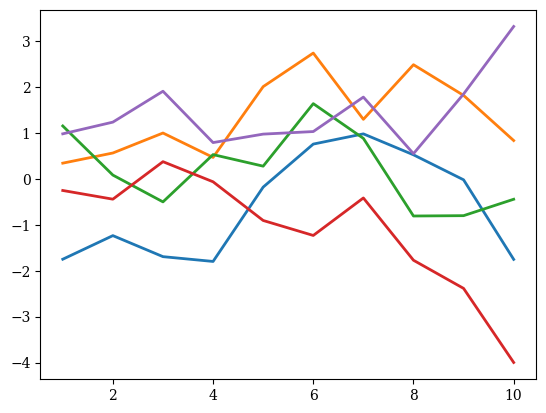

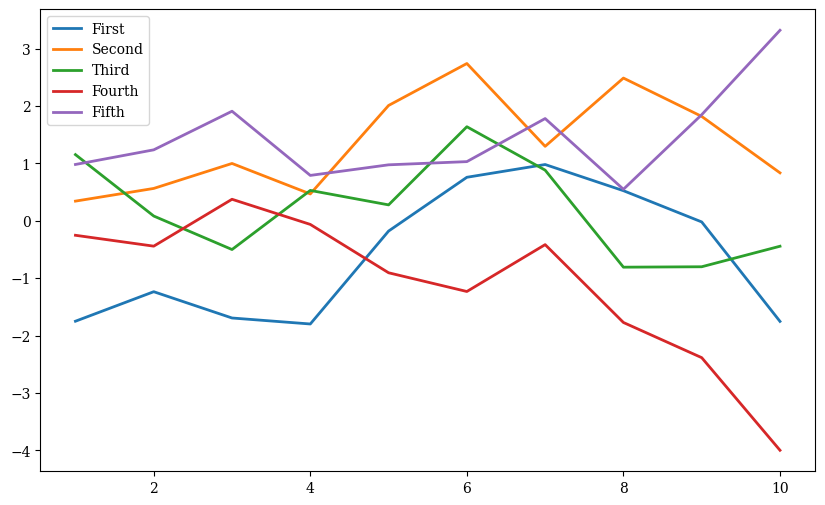

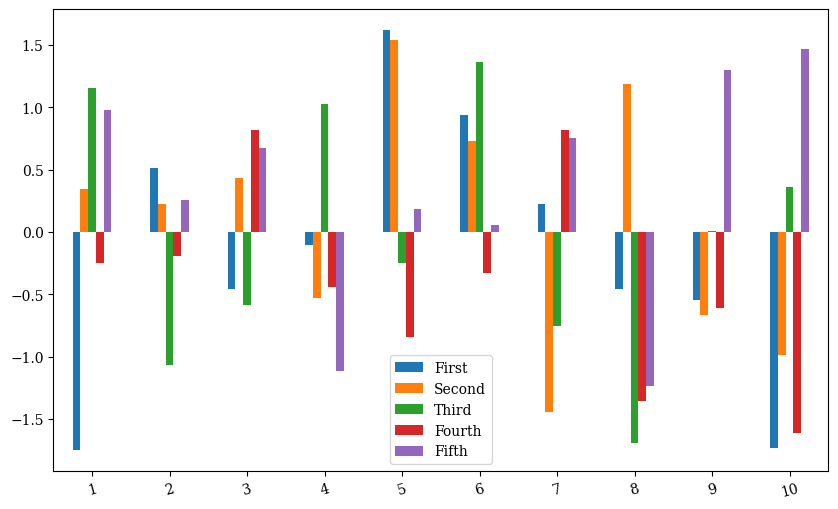

In [16]:
from pylab import plt, mpl
mpl.rcParams['font.family'] = 'serif'

#usual type plotting 
plt.plot(df.cumsum(), lw=2.0)

#using pandas makes it easier
df.cumsum().plot(lw=2.0, figsize=(10,6))
plt.show()

#using bars
df.plot.bar(figsize=(10,6), rot=15)
plt.show()

Example of a nice print of $4\times 4$ matrix

In [17]:
b = np.arange(16).reshape((4,4))
print(b)
df1 = pd.DataFrame(b)
print(df1)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
    0   1   2   3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15


and many other operations. 

The **Series** class is another important class included in
**pandas**. You can view it as a specialization of **DataFrame** but where
we have just a single column of data. It shares many of the same features as _DataFrame. As with **DataFrame**,
most operations are vectorized, achieving thereby a high performance when dealing with computations of arrays, in particular labeled arrays.
As we will see below it leads also to a very concice code close to the mathematical operations we may be interested in.
For multidimensional arrays, we recommend strongly [xarray](http://xarray.pydata.org/en/stable/). **xarray** has much of the same flexibility as **pandas**, but allows for the extension to higher dimensions than two. 